<a href="https://colab.research.google.com/github/Iamjuhwan/Deep-Learing/blob/main/Advanace_ANN_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Building the Advanced ANN**
### 1. **Adding Dropout Layers**
Dropout is a regularization technique that randomly "drops" neurons during training, reducing overfitting by preventing the network from becoming too reliant on specific neurons.
- **Dropout rate:** Proportion of neurons to drop (e.g., 0.5 means 50% of neurons are dropped).
- Applied only during training, not during evaluation.

### 2. **Adding Batch Normalization**
Batch Normalization normalizes the input of each layer to improve training speed and stability, ensuring that the mean activation is close to zero and the standard deviation is close to one.
- Accelerates training.
- Reduces sensitivity to initialization.
- Acts as a form of regularization.


### 3. **Using Early Stopping**
Early Stopping halts training when the validation performance stops improving, preventing overfitting.
- **monitor:** Metric to monitor (e.g., 'val_loss').
- **patience:** Number of epochs to wait before stopping.

### **4. Learning Rate Schedules**
Adjusting the learning rate dynamically during training can improve convergence and reduce training time. TensorFlow offers several schedules:
- **Exponential Decay:** Reduces the learning rate exponentially over epochs.
- **Piecewise Constant Decay:** Uses different learning rates for different ranges of epochs.
- **Cyclic Learning Rates:** Cycles between a lower and upper learning rate.

### **5. Regularization**
Regularization prevents overfitting by adding penalties to the loss function.

- **L1 Regularization:** Adds the absolute values of weights to the loss function.
- **L2 Regularization (Ridge):** Adds the squared values of weights (default in Keras).
- **Elastic Net:** Combines L1 and L2 regularization.

In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing

#Load data
data = fetch_california_housing()
X,y = data.data, data.target

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## the next step is to:
- Building architecture
- compile model
- train

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import LearningRateScheduler


In [10]:

model = Sequential([
    Dense(20, activation='relu', input_dim=(X_train.shape[1])),
    BatchNormalization(),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
#Defining LR Schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=100,
    decay_rate=0.5
)

In [17]:

# Compile the model
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['r2_score', 'mae'])

#Early stopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

In [18]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    verbose=1,
                    validation_split= 0.3,
                    callbacks=[early_stopping]
)

Epoch 1/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5101 - mae: 0.5209 - r2_score: 0.6205 - val_loss: 0.3785 - val_mae: 0.4128 - val_r2_score: 0.7192
Epoch 2/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3434 - mae: 0.4149 - r2_score: 0.7393 - val_loss: 0.3712 - val_mae: 0.4141 - val_r2_score: 0.7246
Epoch 3/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3349 - mae: 0.4098 - r2_score: 0.7541 - val_loss: 0.3609 - val_mae: 0.4284 - val_r2_score: 0.7323
Epoch 4/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3209 - mae: 0.3997 - r2_score: 0.7620 - val_loss: 0.3684 - val_mae: 0.4293 - val_r2_score: 0.7267
Epoch 5/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3162 - mae: 0.3961 - r2_score: 0.7640 - val_loss: 0.3572 - val_mae: 0.4220 - val_r2_score: 0.7350
Epoch 6/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3159 - mae: 0.3975 - r2_score: 0.7635 - val_loss: 0.3542 - val_mae: 0.4202 - val_r2_score: 0.7372
Epoch 7/100
181/181 ━━━━━━━━━━━━━━

In [21]:
test_loss, test_mae, test_r = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")
print(f"Test Loss: {test_loss}")
print(f"Test R2: {test_r}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3331 - mae: 0.4074 - r2_score: 0.7476
Test MAE: 0.7380189895629883
Test Loss: 0.3433021605014801
Test R2: 0.4083337187767029


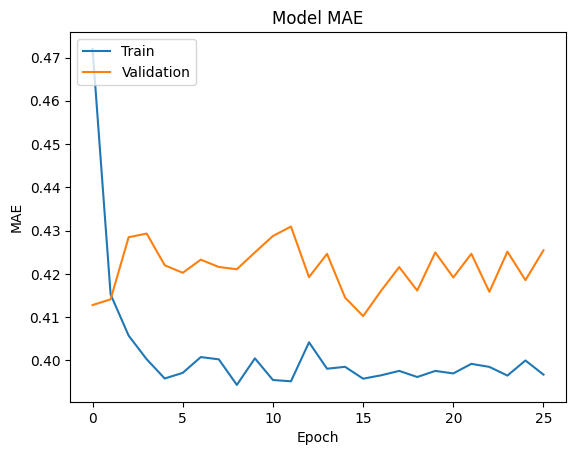

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

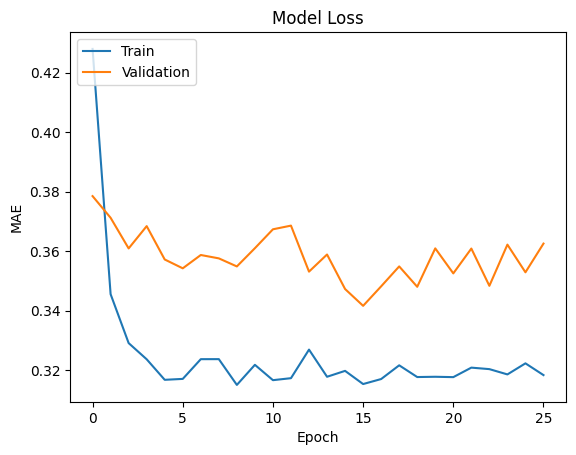

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()